# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

Which variables would we need to **dummify**?

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np

In [3]:
df_penguins = load_penguins()
df_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


We would need to dummify Sex, Island, and Species.

Let's use `bill_length_mm` to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Simple linear regression (e.g. straight-line) model
* Quadratic (degree 2 polynomial) model
* Cubic (degree 3 polynomial) model
* Degree 10 polynomial model

Make predictions for each model and plot your fitted models on the scatterplot.

In [4]:
df_penguins = df_penguins.dropna(subset=["bill_depth_mm", "bill_length_mm"])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_lr_test = lr_fit.predict(X_test)
y_lr_train = lr_fit.predict(X_train)

df_linear = pd.DataFrame({"Actual": y_test,
              "Predicted": y_lr_test})

In [ ]:
from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_linear, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Simple Linear Regression")
+ geom_smooth(method='lm', color='blue'))

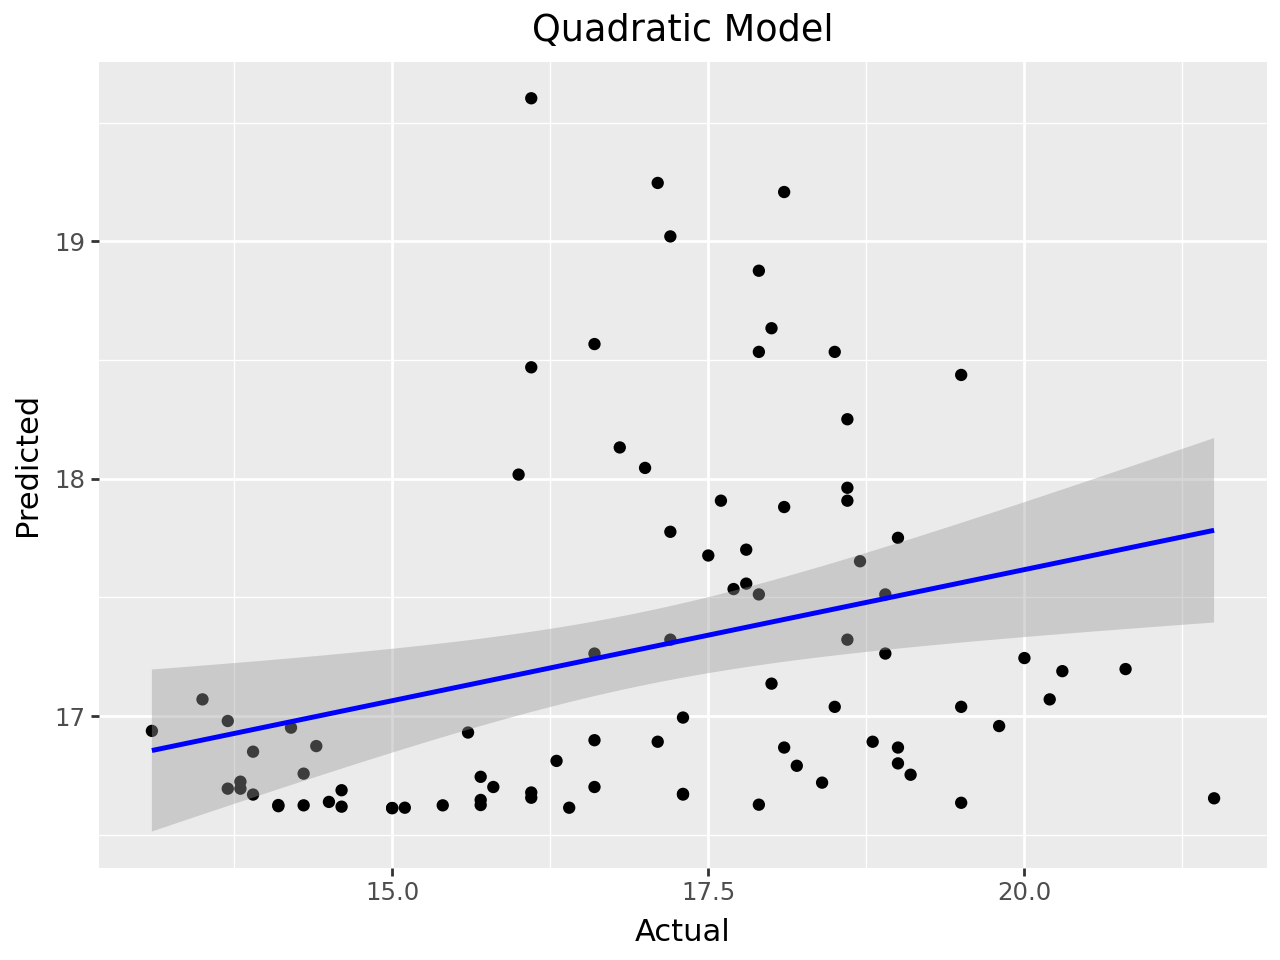

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_2"] = df_penguins[["bill_length_mm"]] ** 2
df_penguins["bill_length_mm_3"] = df_penguins[["bill_length_mm"]] ** 3
df_penguins["bill_length_mm_4"] = df_penguins[["bill_length_mm"]] ** 4
df_penguins["bill_length_mm_5"] = df_penguins[["bill_length_mm"]] ** 5
df_penguins["bill_length_mm_6"] = df_penguins[["bill_length_mm"]] ** 6
df_penguins["bill_length_mm_7"] = df_penguins[["bill_length_mm"]] ** 7
df_penguins["bill_length_mm_8"] = df_penguins[["bill_length_mm"]] ** 8
df_penguins["bill_length_mm_9"] = df_penguins[["bill_length_mm"]] ** 9

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm", "bill_length_mm_2"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_quad = lr_fit.predict(X_test)
y_quad_train = lr_fit.predict(X_train)

df_quad = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_quad})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_quad, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Quadratic Model")
+ geom_smooth(method='lm', color='blue'))

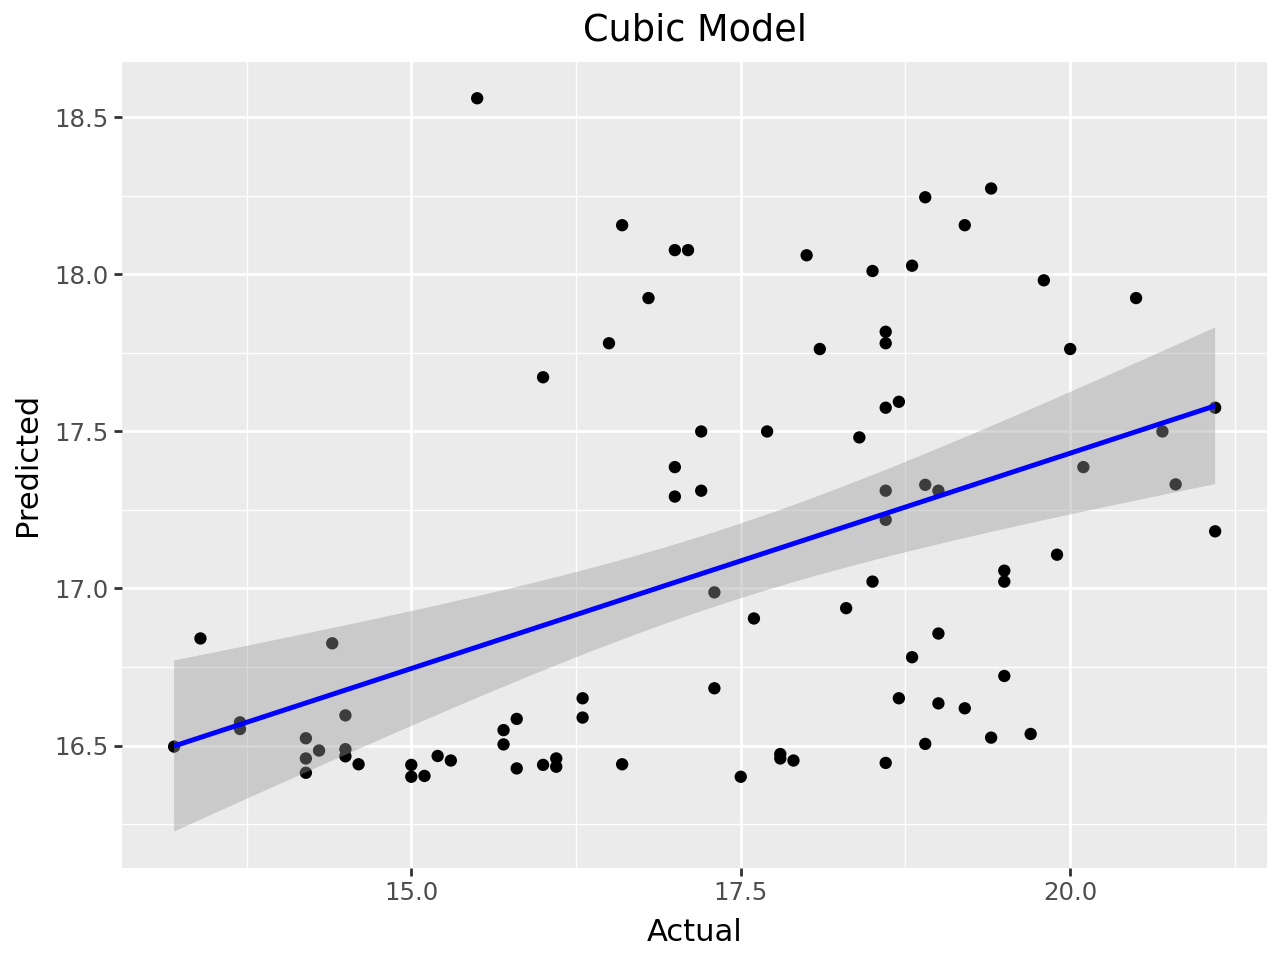

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_3"] = df_penguins[["bill_length_mm"]] ** 3

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_test_cubic = lr_fit.predict(X_test)
y_train_cubic = lr_fit.predict(X_train)

df_cubic = pd.DataFrame({"Actual": y_test,
              "Predicted": y_test_cubic})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_cubic, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Cubic Model")
+ geom_smooth(method='lm', color='blue'))

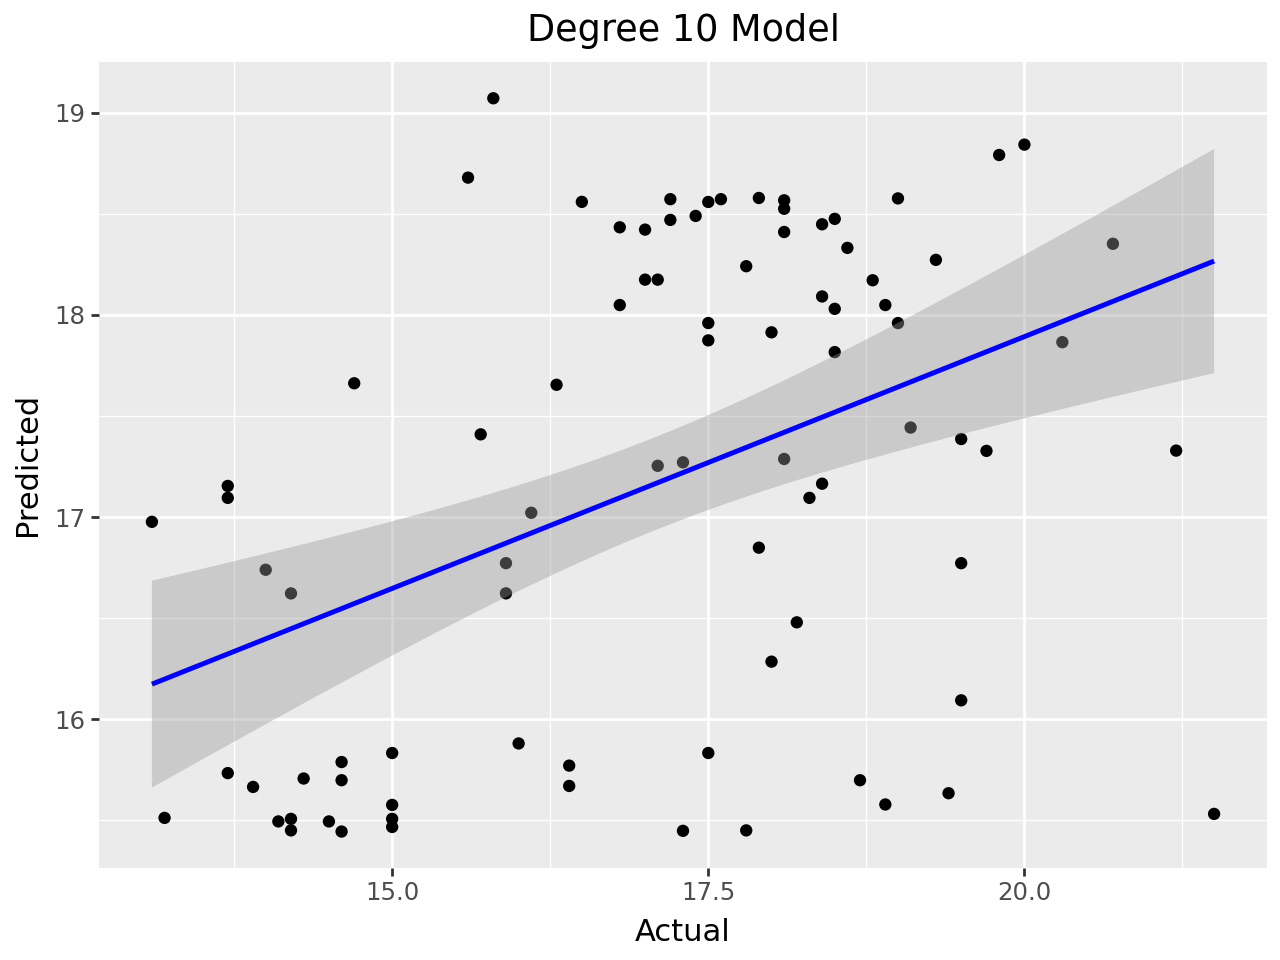

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_penguins["bill_length_mm_10"] = df_penguins[["bill_length_mm"]] ** 10

y = df_penguins["bill_depth_mm"]
X = df_penguins[["bill_length_mm", "bill_length_mm_2", "bill_length_mm_3", 
                 "bill_length_mm_4", "bill_length_mm_5", "bill_length_mm_6", 
                 "bill_length_mm_7", "bill_length_mm_8", "bill_length_mm_9", 
                 "bill_length_mm_10"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

lr = LinearRegression()
lr_fit = lr.fit(X_train, y_train)

y_pred_10 = lr_fit.predict(X_test)
y_train_10 = lr_fit.predict(X_train)

df_10 = pd.DataFrame({"Actual": y_test,
              "Predicted": y_pred_10})

from plotnine import aes, geom_point, ggplot, labs, geom_smooth

(ggplot(df_10, aes(x="Actual", y="Predicted"))
+ geom_point()
+ labs(title="Degree 10 Model")
+ geom_smooth(method='lm', color='blue'))

In [26]:
from sklearn.metrics import mean_squared_error

# Test MSE
lr_mse_test = mean_squared_error(y_test, y_lr_test)
quad_mse_test = mean_squared_error(y_test, y_pred_quad)
cubic_mse_test = mean_squared_error(y_test, y_test_cubic)
ten_mse_test = mean_squared_error(y_test, y_pred_10)

lr_mse_test, quad_mse_test, cubic_mse_test, ten_mse_test

(3.8003360620368656, 4.808617164728677, 4.158743792561711, 5.24783129977836)

In [28]:
from sklearn.metrics import r2_score

# Test R2
lr_r2_test = r2_score(y_test, y_lr_test)
quad_r2_test = r2_score(y_test, y_pred_quad)
cubic_r2_test = r2_score(y_test, y_test_cubic)
ten_r2_test = r2_score(y_test, y_pred_10)

lr_r2_test, quad_r2_test, cubic_r2_test, ten_r2_test

(-0.027940877444691425,
 -0.3006676427867052,
 -0.12488545049942457,
 -0.41946928453601395)

* Are any of the models above underfitting the data? If so, which ones and how can you tell?
* Are any of thhe models above overfitting the data? If so, which ones and how can you tell?
* Which of the above models do you think fits the data best and why?

The model that fits the data best has similar metrics for test and training splits. The models that are underfitting are doing better with the test data and the models that overfit do better with the training data.